In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from patsy import dmatrices, dmatrix

# 1. Data ingest #

In [57]:
# data from ISL book: https://trevorhastie.github.io/ISLR/data.html
df = pd.read_csv("Auto.csv")
print(df.head())
# indicate which columns should be treated as categorical
df_cat = df.astype({'origin': 'category'})
df_cat.dtypes

      mpg  cylinders  displacement horsepower  weight  acceleration  year   
0    18.0          8         307.0        130    3504          12.0    70  \
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

In [15]:
# Split the data into training (80%) and validation set (20%)
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
valid = df[~mask]

# 2. Excercises
### a)

In [52]:
y, X = dmatrices('mpg ~ horsepower ', data=df_cat, return_type='dataframe')

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     12.60
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           2.79e-64
Time:                        21:35:37   Log-Likelihood:                -1065.5
No. Observations:                 397   AIC:                             2319.
Df Residuals:                     303   BIC:                             2694.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5941      0.984     19.920      0.000      17.658      21.530
horsepower[T.102]     0.4059      4.173      0.097      0.923      -7.806       8.618
horsepower[T.103]     0.7059      4.173      0.169      0.866      -7.506       8.918
horsepower[T.105]     0.9059      1.529      0.592      0.554      -2.103       3.915
horsepower[T.107]     1.4059      4.173      0.337      0.736      -6.806       9.618
horsepower[T.108]    -0.5941      4.173     -0.142      0.887      -8.806       7.618
horsepower[T.110]     0.2392      1.372      0.174      0.862      -2.460       2.938
horsepower[T.112]     0.0725      2.540      0.029      0.977      -4.925       5.070
horsepower[T.113]     6.4059      4.173      1.535      0.126      -1.806      14.618
horsepower[T.115]     5.1459      2.063      2.494      0.013       1.086       9.206
horsepower[T.116]     5.8059      4.173      1.391      0.165      -2.406      14.018
horsepower[T.120]    -1.0191      2.254     -0.452      0.651      -5.454       3.416
horsepower[T.122]     0.4059      4.173      0.097      0.923      -7.806       8.618
horsepower[T.125]     0.1392      2.540      0.055      0.956      -4.859       5.137
horsepower[T.129]    -4.2941      3.032     -1.416      0.158     -10.260       1.672
horsepower[T.130]    -4.3941      2.063     -2.130      0.034      -8.454      -0.334
horsepower[T.132]    13.1059      4.173      3.140      0.002       4.894      21.318
horsepower[T.133]    -3.3941      4.173     -0.813      0.417     -11.606       4.818
horsepower[T.135]    -1.3941      4.173     -0.334      0.739      -9.606       6.818
horsepower[T.137]    -5.5941      4.173     -1.340      0.181     -13.806       2.618
horsepower[T.138]    -3.0941      4.173     -0.741      0.459     -11.306       5.118
horsepower[T.139]    -0.4441      3.032     -0.146      0.884      -6.410       5.522
horsepower[T.140]    -3.2513      1.821     -1.785      0.075      -6.835       0.333
horsepower[T.142]    -4.0941      4.173     -0.981      0.327     -12.306       4.118
horsepower[T.145]    -4.1370      1.821     -2.271      0.024      -7.721      -0.553
horsepower[T.148]    -5.5941      4.173     -1.340      0.181     -13.806       2.618
horsepower[T.149]    -3.5941      4.173     -0.861      0.390     -11.806       4.618
horsepower[T.150]    -4.8896      1.310     -3.733      0.000      -7.467      -2.312
horsepower[T.152]    -5.0941      4.173     -1.221      0.223     -13.306       3.118
horsepower[T.153]    -5.5941      3.032     -1.845      0.066     -11.560       0.372
horsepower[T.155]    -4.6441      3.032     -1.532      0.127     -10.610       1.322
horsepower[T.158]    -6.5941      4.173     -1.580      0.115     -14.806       1.618
horsepower[T.160]    -6.5941      3.032     -2.175      0.030     -12.560

b)

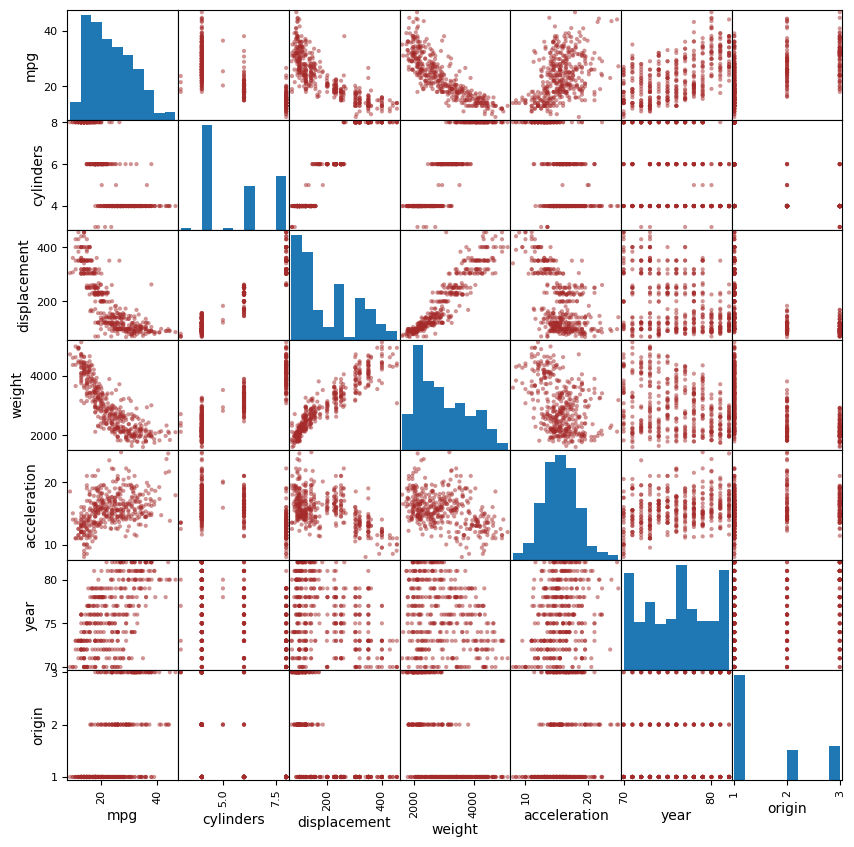

In [55]:
# some columns contain categorical data
# scatter_plot 
_ = pd.plotting.scatter_matrix(df, color="brown",figsize=(10,10),)

In [56]:
df.corr()

ValueError: could not convert string to float: '?'